In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import cv2



#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

Duplicate key in file PosixPath('/Users/k22120kk/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 262 ('font.family:  sans-serif')


In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../../data/焼きそば1/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

センシング開始
0.0 34.0
トングを撮る
34.0 44.0
肉を掴む
44.0 57.0
やけどする
57.0 71.0
てを冷やす
71.0 209.255


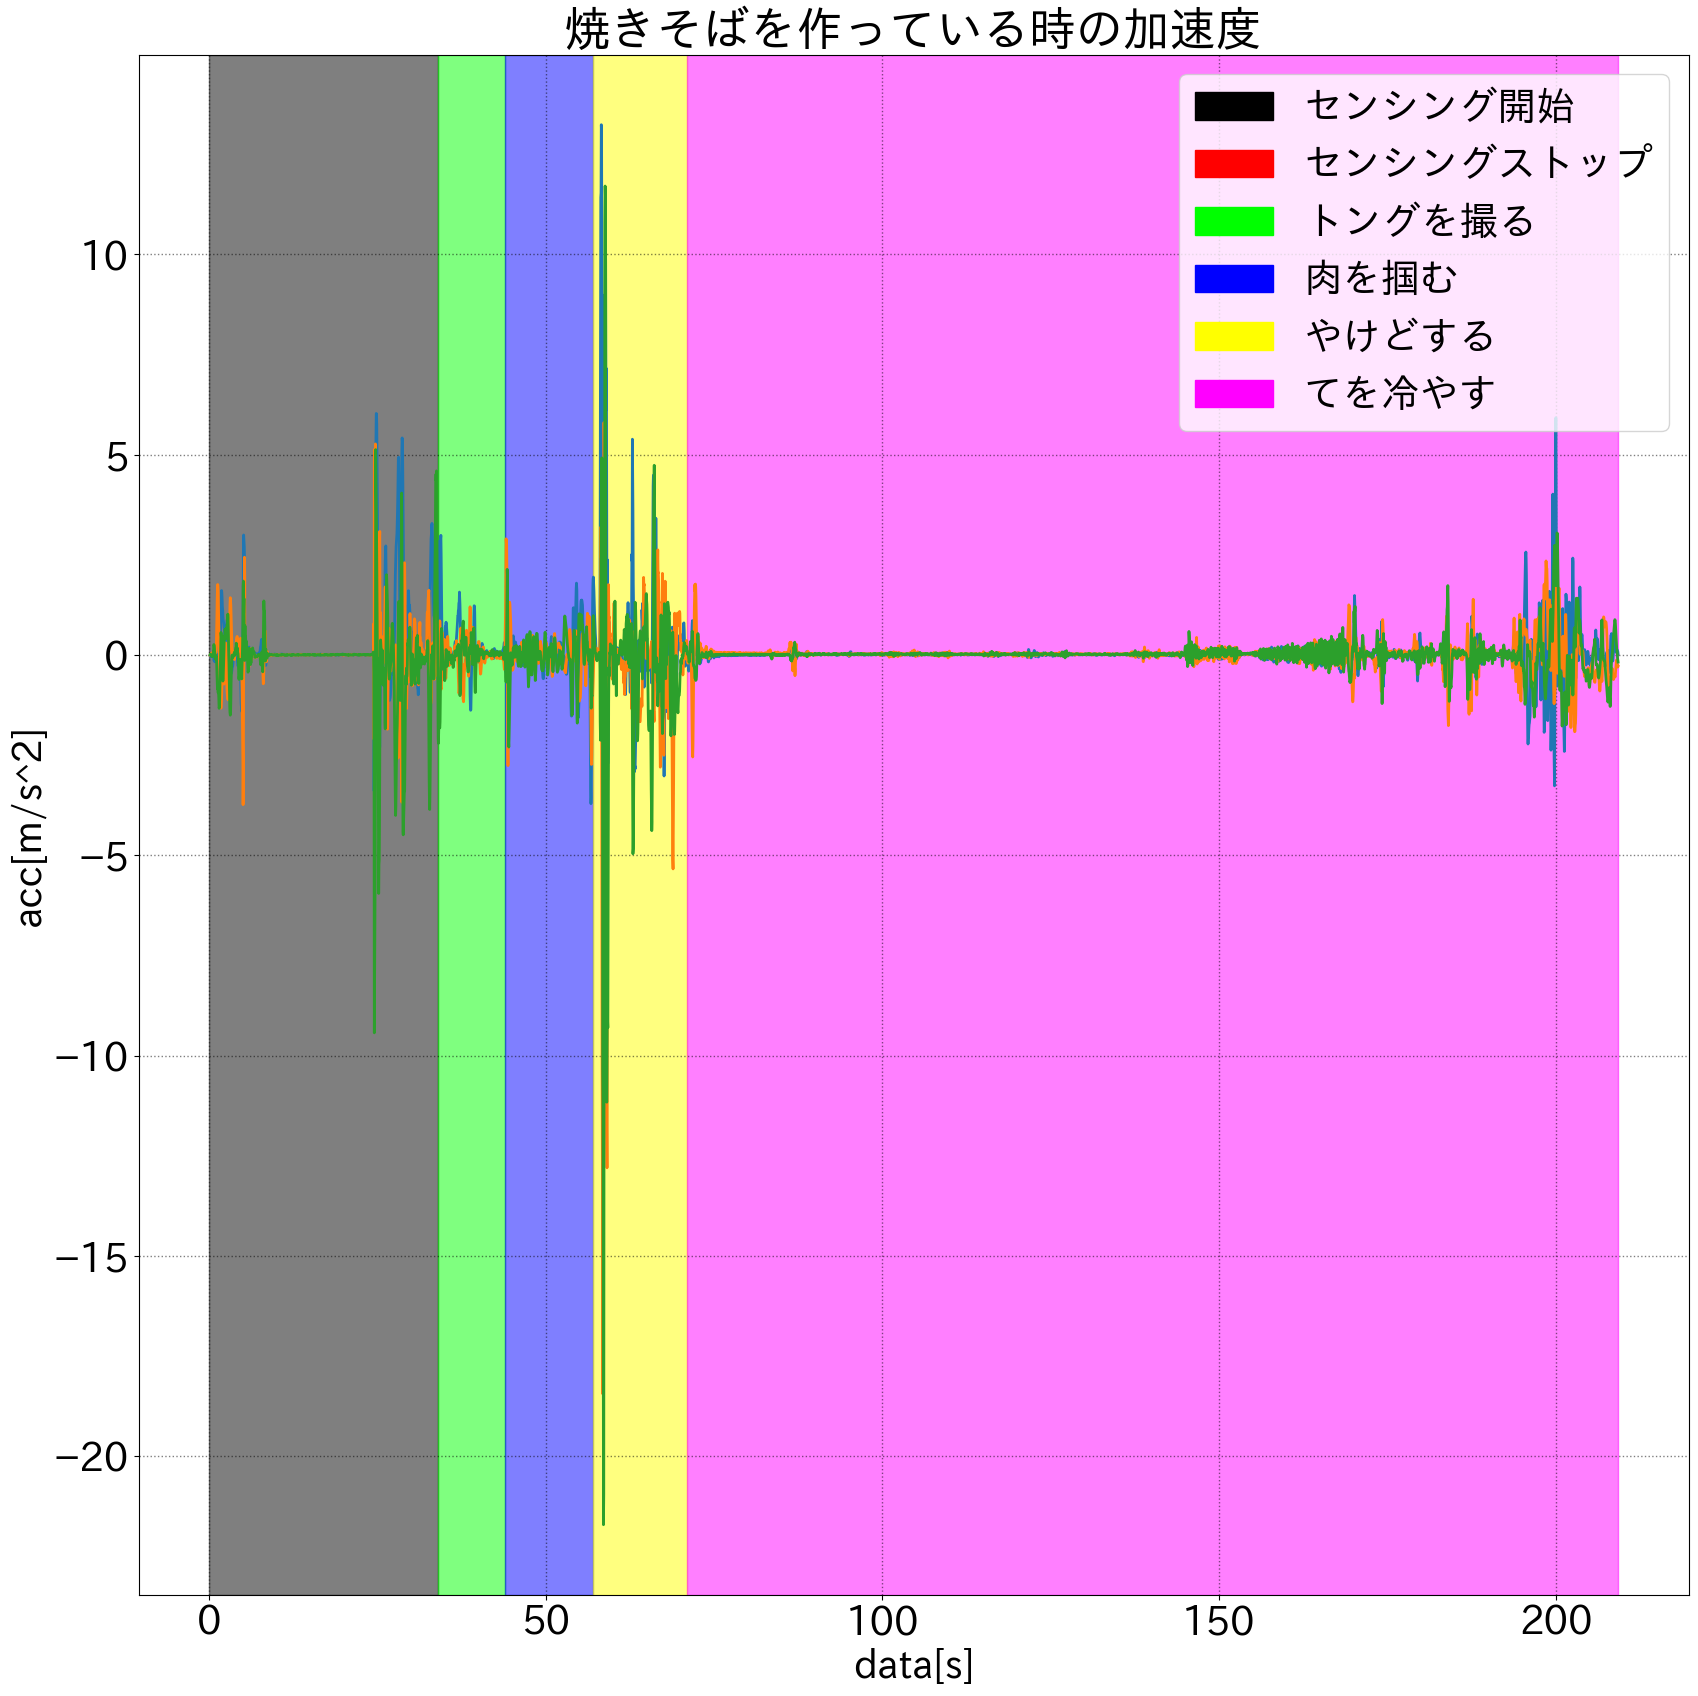

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("焼きそばを作っている時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()


# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "トングを撮る": "#00ff00",
    "肉を掴む": "#0000ff",
    "やけどする": "#ffff00",
    "てを冷やす": "#ff00ff",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000
    else :
        end_time = (acc["time"].iloc[-1] - acc["time"][0]) / 1000

    start_time = start_time
    end_time = end_time

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

センシング開始
0.0 34.0
トングを撮る
34.0 44.0
肉を掴む
44.0 57.0
やけどする
57.0 71.0
てを冷やす
71.0 209.255


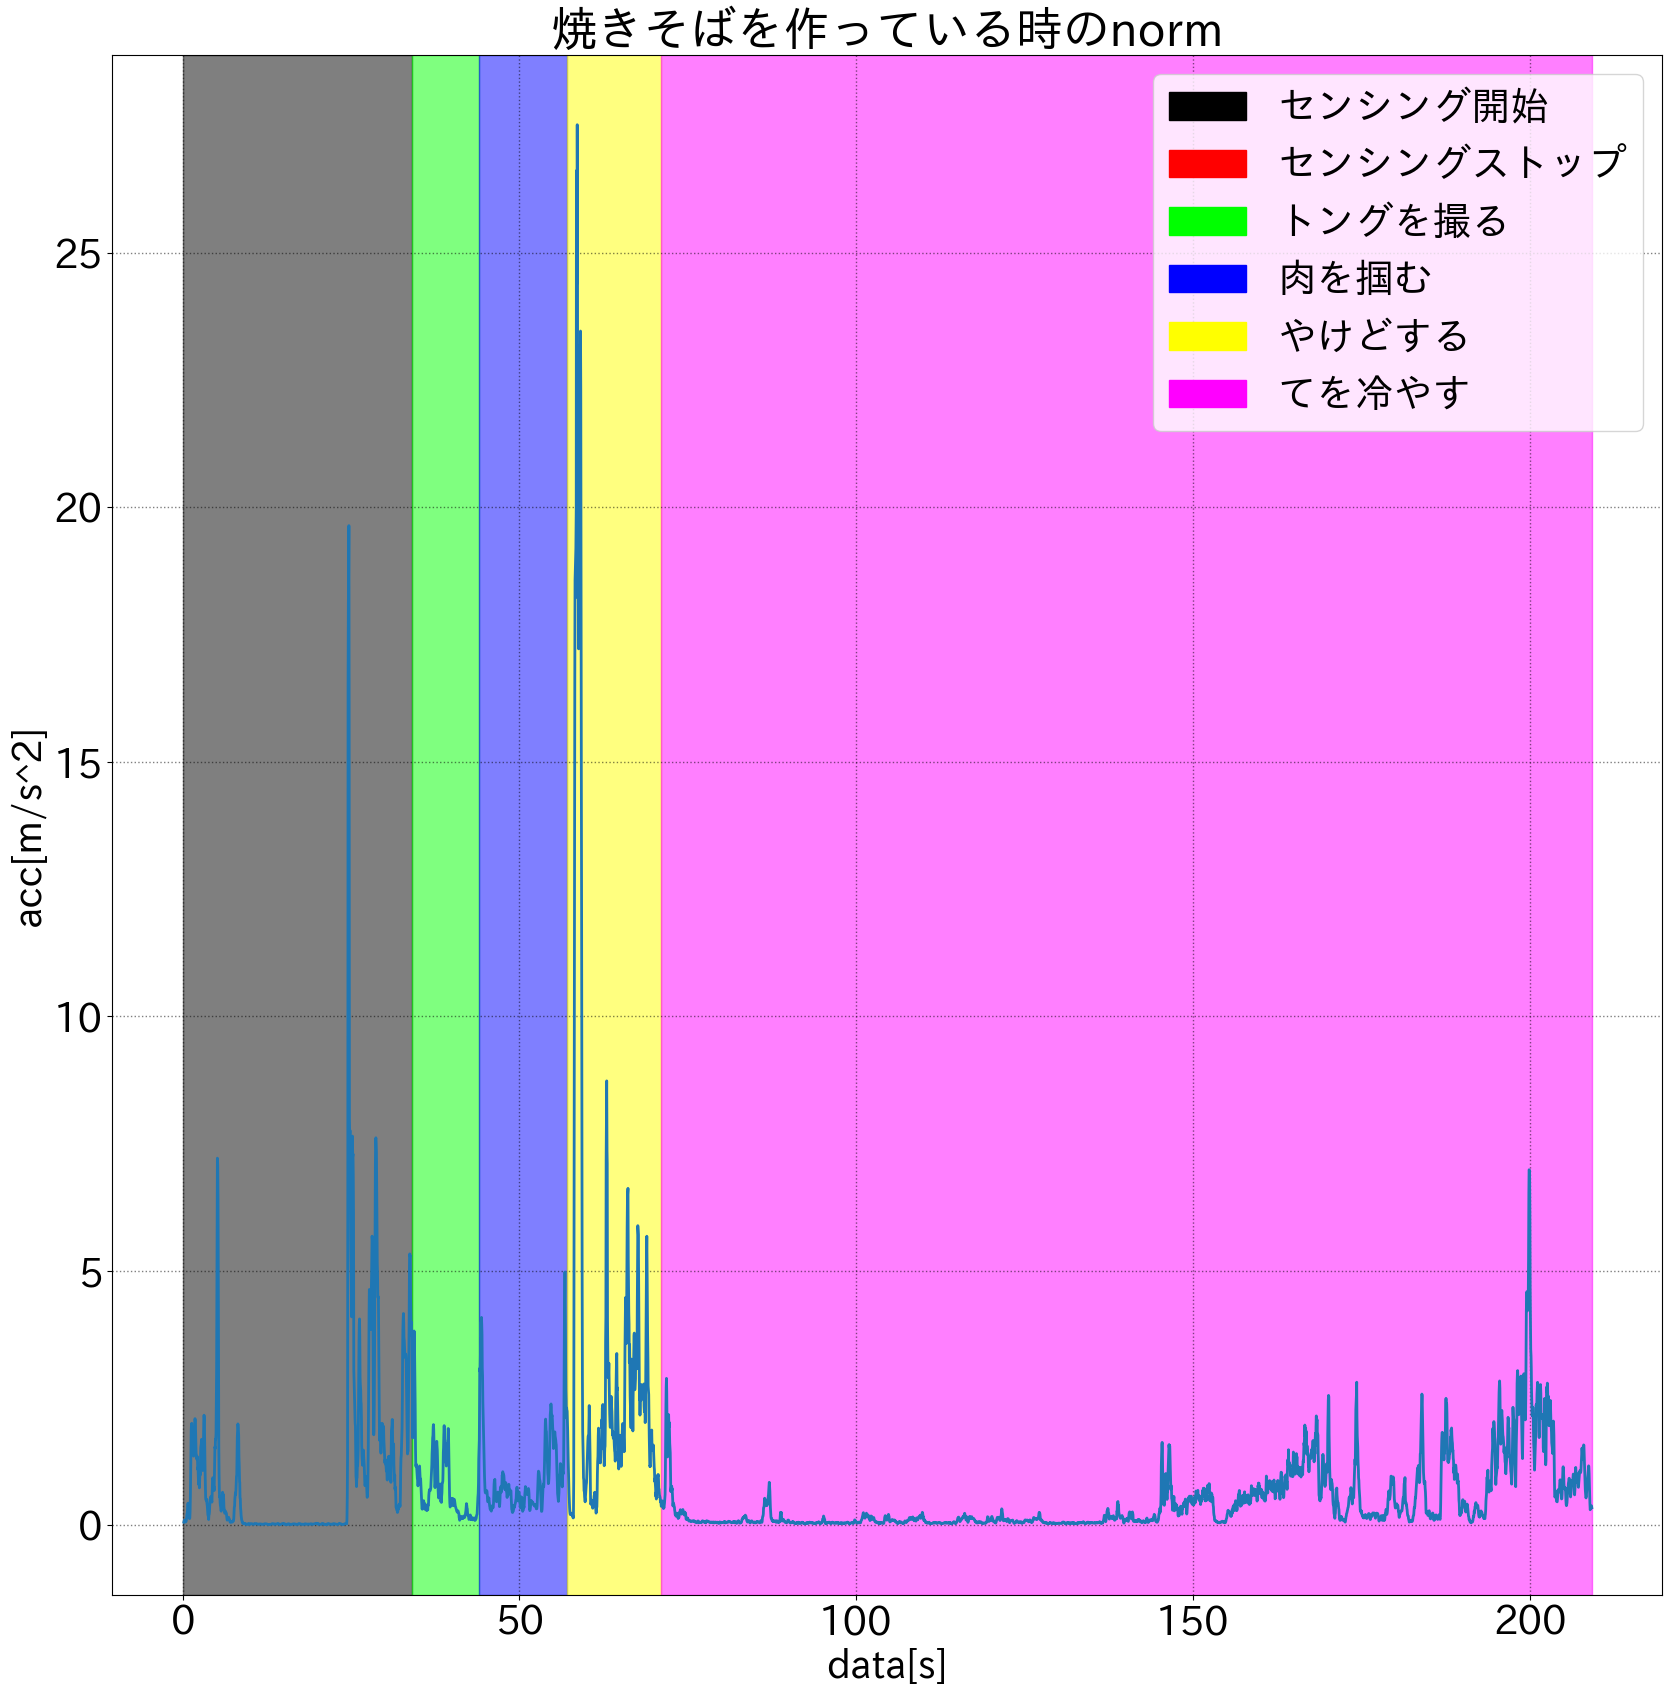

In [4]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("焼きそばを作っている時のnorm")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
norm = np.sqrt(acc["x"]**2 + acc["y"]**2 + acc["z"]**2)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    norm.rolling(window=5).mean(),
    label="norm",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "トングを撮る": "#00ff00",
    "肉を掴む": "#0000ff",
    "やけどする": "#ffff00",
    "てを冷やす": "#ff00ff",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000
    else :
        end_time = (acc["time"].iloc[-1] - acc["time"][0]) / 1000

    start_time = start_time
    end_time = end_time

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

0.02463501469498937
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5150    0.588365
5151    0.496850
5152    0.399905
5153    0.345636
5154    0.335592
Length: 5155, dtype: float64
[  5195.85645005  14288.60523763  23381.35402522  32474.1028128
  41566.85160039  50659.60038797  59752.34917556  68845.09796314
  77937.84675073  87030.59553831  96123.3443259  105216.09311348
 114308.84190107 123401.59068865 132494.33947624 141587.08826382
 150679.83705141 159772.58583899 168865.33462658 177958.08341416
 187050.83220175 196143.58098933]
    time  content
0      0  センシング開始
1  34000   トングを撮る
2  44000     肉を掴む
3  57000    やけどする
4  71000    てを冷やす
0 34000
34000 44000
44000 57000
57000 71000
71000 1694263711087


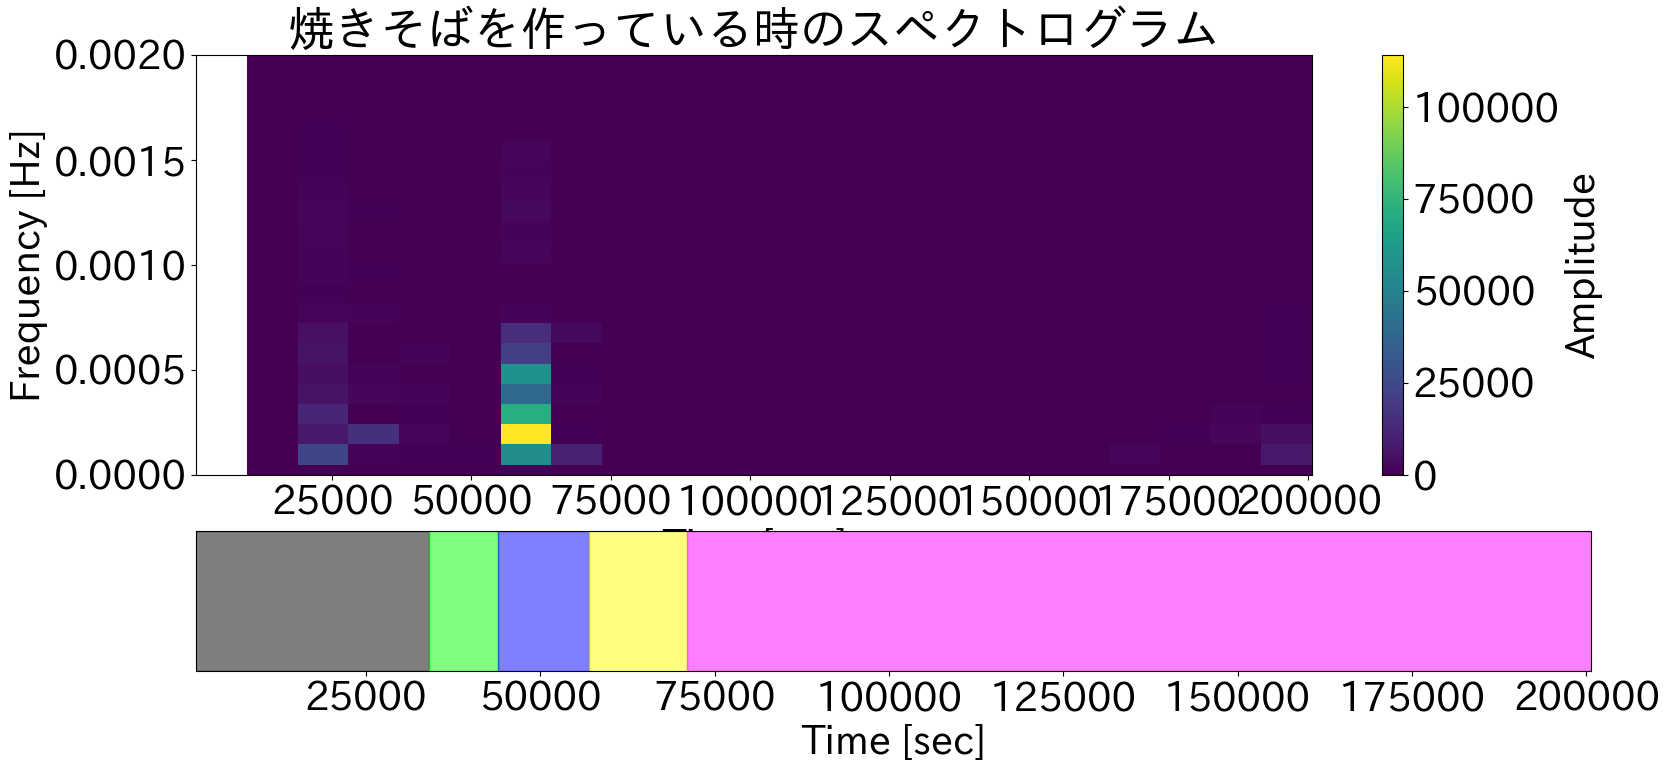

In [5]:
# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

print(fs)
print(norm)
print(t)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# 画像を大きく表示する
fig.set_size_inches(18, 8)

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("焼きそばを作っている時のスペクトログラム")

# 縦軸は0.001を最大値にする
ax1.set_ylim(0, 0.002)

cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

print(ans)


# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "トングを撮る": "#00ff00",
    "肉を掴む": "#0000ff",
    "やけどする": "#ffff00",
    "てを冷やす": "#ff00ff",
}

# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0])
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0])
    else :
        end_time = (acc["time"].iloc[-1] - ans["time"][0])

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()
